## Consider a bar of length 2mm, height 1mm and thickness 1mm, made from steel (E = 210 GPa, $\nu=0.3$). The problem is modelled using a single Q8 element.
## A load of 100N is applied at the right edge, and rollers are constraining the left edge from moving in the x-direction. The midside node is also constrained from moving in the y-direction.
## The applied load is modelled using consistent nodal loads in the input file q8_element_pull.inp

# Question 1
## 1.1 Do you expect a plane stress analysis of the problem to do more or less work than a plane strain analysis? Motivate your anticipated result in one line.

-------

Plane stress will do more work:
Both will have the same force, but plane strain deformation less as it resist change in volume more.

-------

## 1.2 Compare the work done by the applied load for a plane stress and plane strain analysis of the prolbem using the q8_element_pull.inp file.

In [1]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_element_pull_planestrain',MagFac=1000)

F = np.zeros((16,1))
F[2*2-2] = 16.6667
F[3*2-2] = 16.6667
F[6*2-2] = 66.6667

print('Work done: {}'.format(0.5*np.dot(F.transpose(),U)))

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0050 seconds.
Done assembling K and F    :   0.0112 seconds.
Done solving system        :   0.0027 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0028 seconds.
Done post-processing stress:   0.0059 seconds.
Done writing output        :   0.0021 seconds.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Work done: [[0.04333342]]


 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0080 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0020 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


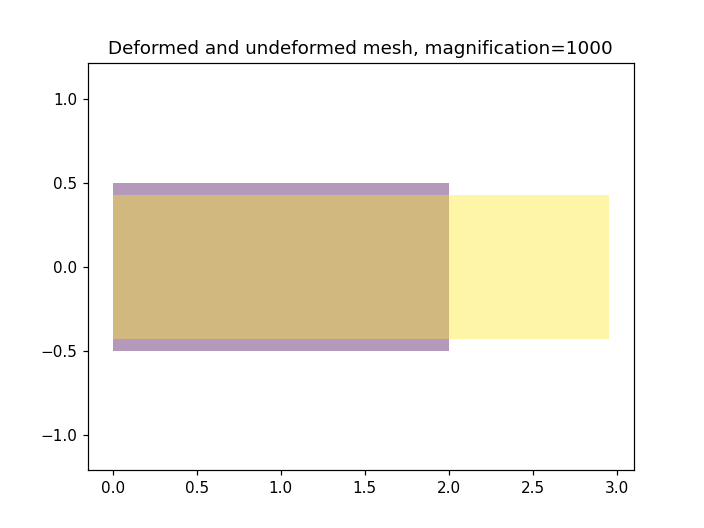

<IPython.core.display.Javascript object>


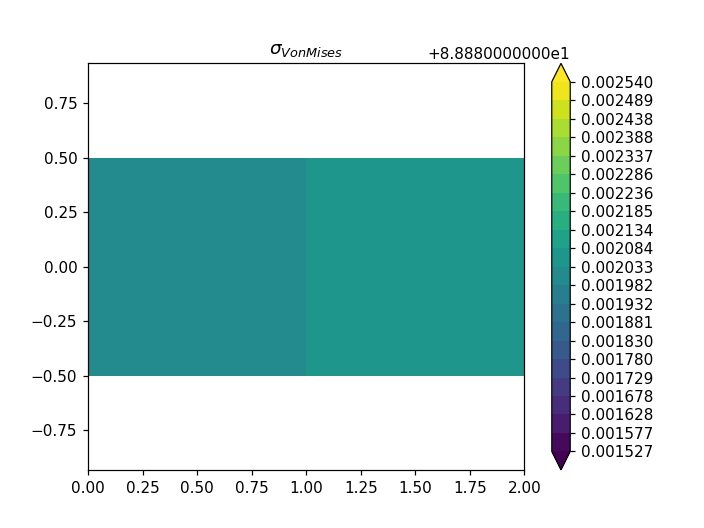

<IPython.core.display.Javascript object>


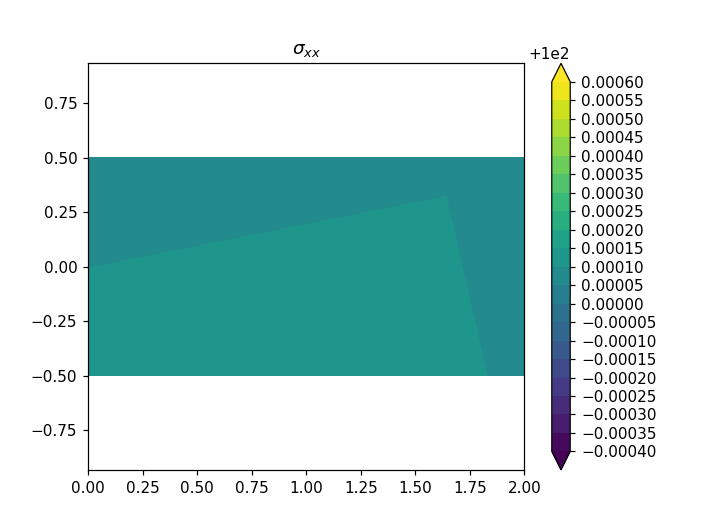

<IPython.core.display.Javascript object>


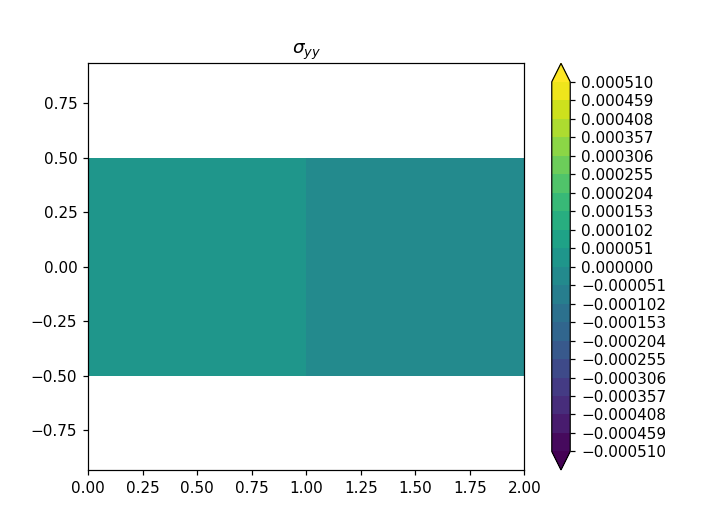

<IPython.core.display.Javascript object>


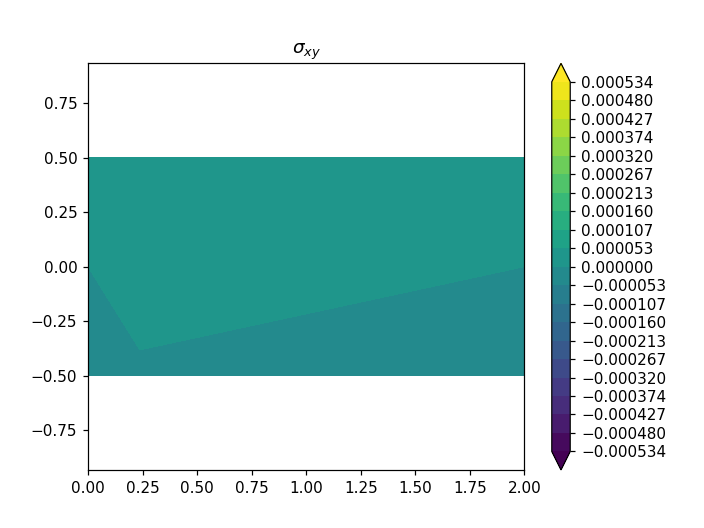

Work done: [[0.04761914]]
[[ 0.00000000e+00]
 [ 7.14286464e-05]
 [ 9.52381991e-04]
 [ 7.14286920e-05]
 [ 9.52381991e-04]
 [-7.14286920e-05]
 [ 0.00000000e+00]
 [-7.14286464e-05]
 [ 4.76190989e-04]
 [ 7.14286297e-05]
 [ 9.52381861e-04]
 [ 7.07441918e-18]
 [ 4.76190989e-04]
 [-7.14286297e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]


In [4]:
%matplotlib notebook
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_element_pull_planestress',MagFac=1000)

print('Work done: {}'.format(0.5*np.dot(F.transpose(),U)))
print(U)

As the above simulation suggest. Plane stress does more work at 0.04761914 mJ and Plane strain at 0.04333342 mJ. 

## 1.3 Compare the work done above against a hand calculation of the expected strain energy

In [5]:
F = 100
E = 210E9
L = 2
A = 0.001**2
Stress = F/A
epsilon = Stress/E
D = L*epsilon
W_PlaneStress = 0.5*F*D

print('Plane stress work in mJ hand calc:')
print(W_PlaneStress)
print('Almost exactly the same as the plane stress model')

Plane stress work in mJ hand calc:
0.047619047619047616
Almost exactly the same as the plane stress model


## 1.4 If you were to model the applied load using a single force in the middle of the structure, do you expect the work done by the force to be more or less than the work done when consistent nodal loads are applied?
--------------

I expect more deformation for the same force ei more work.

---------

## 1.5 Model applied load using a single force in the middle of the structure and compare the work done by the force to the work done when consistent nodal loads are applied. Modify the input file q8_element_pull.inp and call it q8_element_pull_planestress_pointload.inp


 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0030 seconds.
Done assembling K and F    :   0.0080 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0010 seconds.
Done computing stresses    :   0.0020 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0020 seconds.


<IPython.core.display.Javascript object>


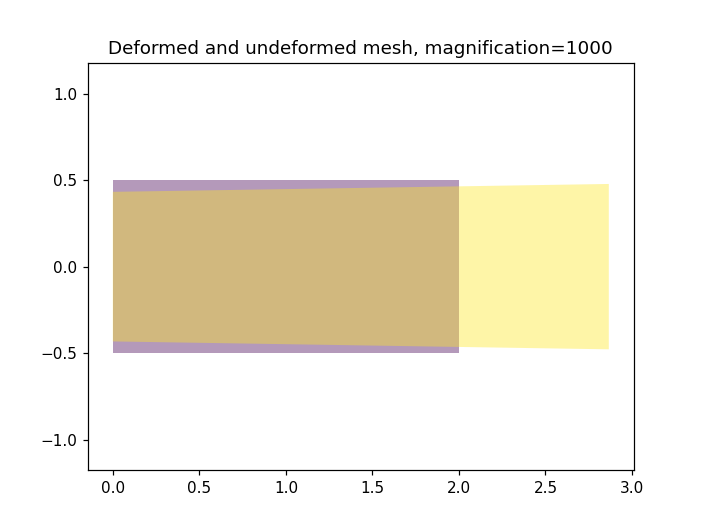

<IPython.core.display.Javascript object>


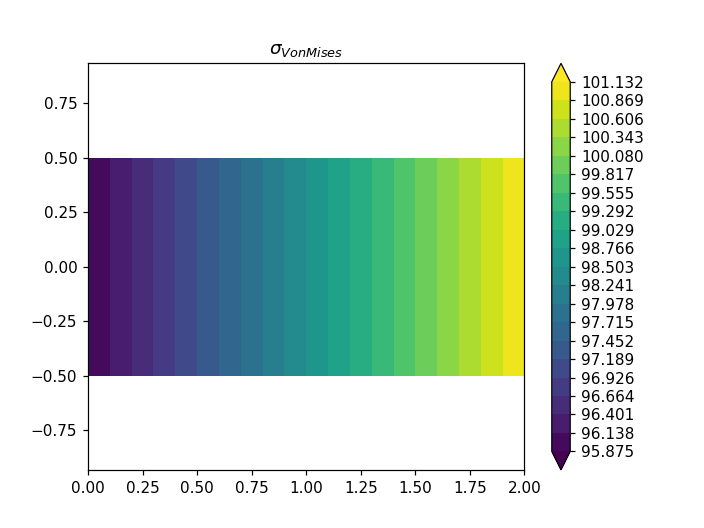

<IPython.core.display.Javascript object>


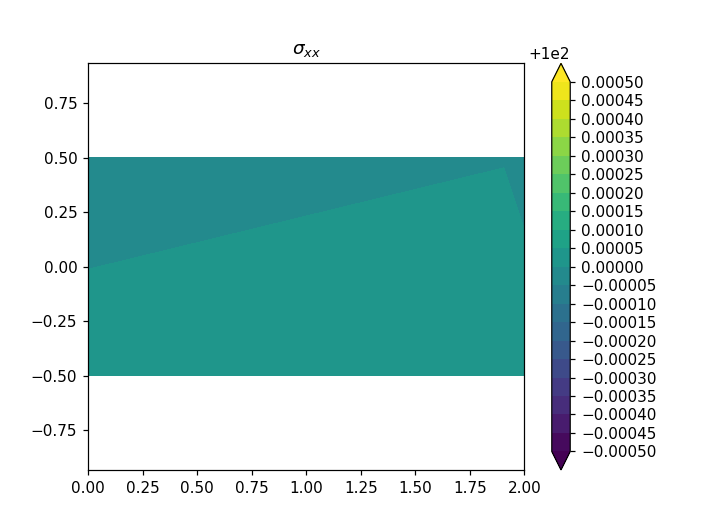

<IPython.core.display.Javascript object>


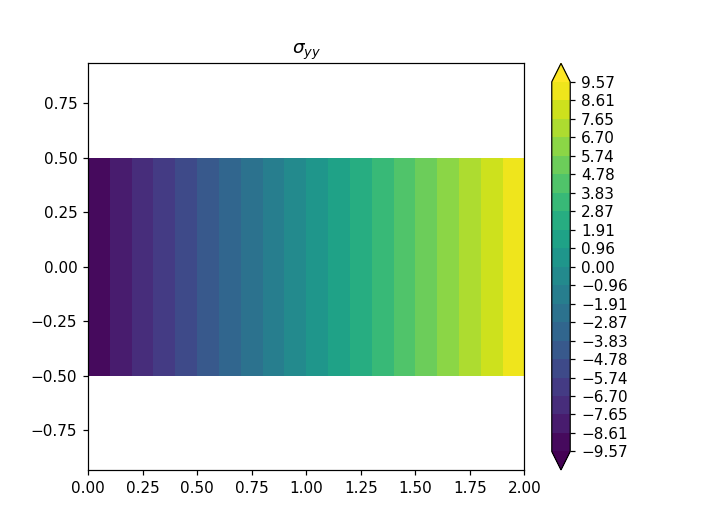

<IPython.core.display.Javascript object>


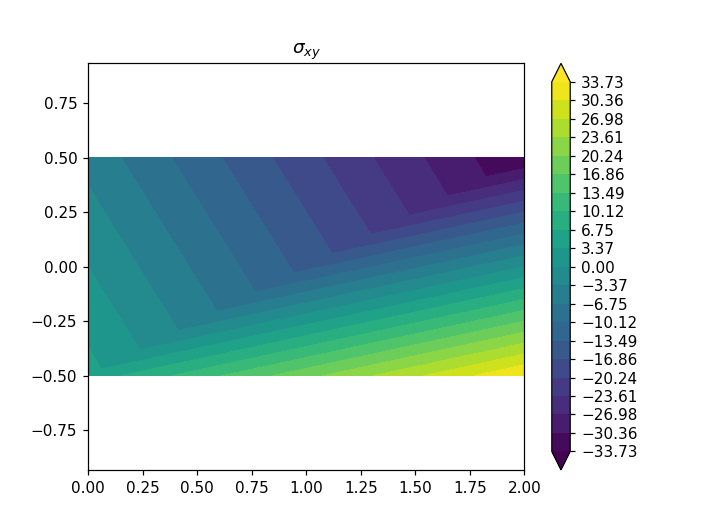

Work done: [[0.04978334]]


In [8]:
%matplotlib notebook
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_element_pull_planestress_pointload',MagFac=1000)

F = np.zeros((16,1))
F[6*2-2] = 100

print('Work done: {}'.format(0.5*np.dot(F.transpose(),U)))

## 1.6 Compare the work done by the consistent nodal load and point load against a hand calculation of the expected strain energy. What do we learn from this comparison?


-------

Work done by consistent loads: 0.04761914 mJ
Work done by point load:       0.04978334 mJ
Work done in hand calc:        0.04761904 mJ
Hand calc solves plane stress exactly.Point load is different, within 5% error. How we applied forces is important.

-------

# Question 2
# In the remainder of the tutorial the structure modelled using a single four-noded (Q4) element, the nodal positions and material properties are given below.
## 2.1 Compare mode shapes and strain energy of an element of dimensions 2mm x 2mm x 1mm (thickness) modelled as plane stress versus plane strain. Identify the deformation modes that changed and those that did not change. For those that did change, identify whether the strain energy increased or decreased between plane stress and plane strain models.

-----------------------
Plane Stress: Eight Eigenvalues
 [ 3.00000000e+05+0.00000000e+00j -8.73114914e-11+0.00000000e+00j
  1.61538462e+05+0.00000000e+00j  1.03846154e+05+0.00000000e+00j
  1.03846154e+05+0.00000000e+00j  1.61538462e+05+0.00000000e+00j
  1.25014174e-12+3.03873148e-12j  1.25014174e-12-3.03873148e-12j]


<IPython.core.display.Javascript object>


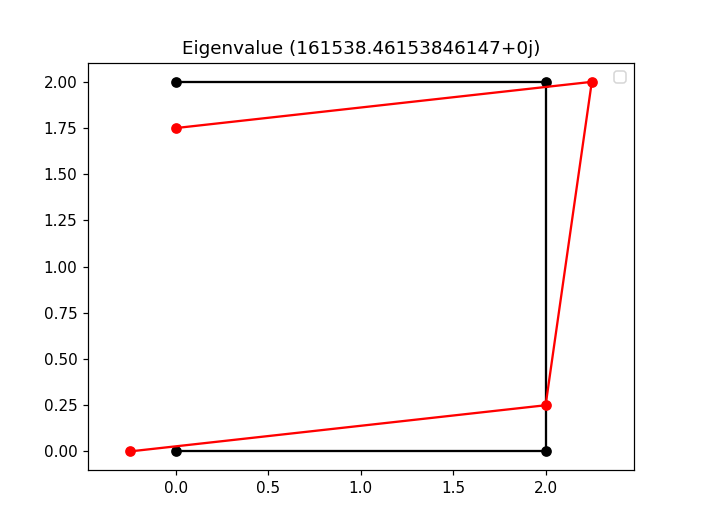

e:\onedrive\tuks\2021-3rd year\env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.


Plane Strain: Eight Eigenvalues
 [ 4.03846154e+05 -4.13535872e-12  1.61538462e+05  1.21153846e+05
  1.61538462e+05  1.21153846e+05 -2.10743687e-11 -4.54787023e-13]


<IPython.core.display.Javascript object>


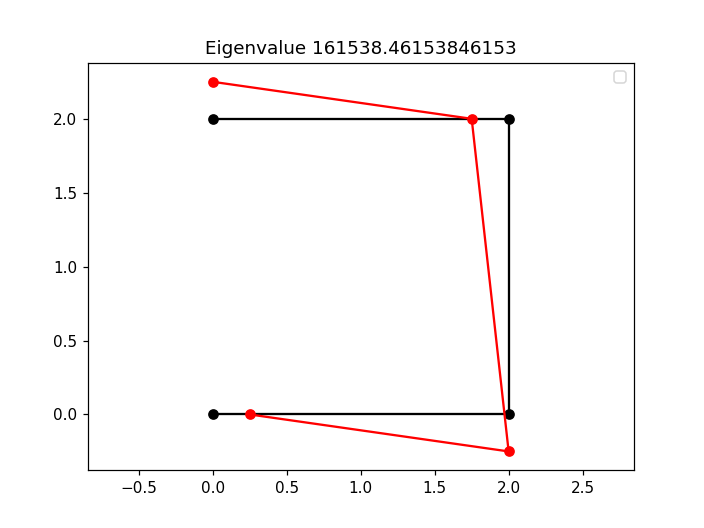

No handles with labels found to put in legend.


In [38]:
import numpy as np
from elements import Quad4_Stiffness

X = np.array([[0.0, 0],
              [2.0, 0],
              [2.0, 2],
              [0.0, 2]])

E = 2.1E5
v = 0.3
matDpstress = E/(1-v**2)*np.array([[1,v,0],[v,1,0,],[0,0,(1-v)/2]])
matDpstrain = E/((1+v)*(1-2*v))*np.array([[1-v,v,0],[v,1-v,0,],[0,0,(1-2*v)/2]])
print('-----------------------')

Kelem = Quad4_Stiffness(X,matDpstress,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('Plane Stress: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 2
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(100)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()


Kelem = Quad4_Stiffness(X,matDpstrain,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('Plane Strain: Eight Eigenvalues\n {}'.format(Eigenvalue))
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(101)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()

MODE    SHAPEPstress    SHAPEPstrian    ENERGYPstress    ENERGYPstrian   
0       uni-compress    uni-compress    300 000          403 846 SAME
1       rot-CW          rot_ACW         0                0       SAME
2       shear+ycomp     shear+xcomp     161 538          161 538 SAME
3       bending         bending         103 846          121 153 SAME
4       comp@L          Y-comp          103 846          161 538 CHANGE INCREASED
5       Y-comp          comp@L          161 538          121 153 CHANGE INCREASED
6       trans+y_rotACW  rotCW_trans-y   0                0       CHANGE 0
7       trans+y_rotACW  trans-x         0                0       CHANGE 0

## 2.1 Compare the plane stress and plane strain deformation modes against each other for the material E = 210GPa and $\nu=0$.
## 2.2. Compare the mode shapes and strain energies between the two materials, one material with $\nu=0.3$ and the other material $\nu=0$. Identify the deformation modes that changed and those that did not change.

-----------------------
Plane Stress: Eight Eigenvalues
 [-2.91038305e-11+0.00000000e+00j  2.10000000e+05+0.00000000e+00j
  1.05000000e+05+0.00000000e+00j  1.05000000e+05+0.00000000e+00j
 -2.01563613e-11+9.46796623e-12j -2.01563613e-11-9.46796623e-12j
  2.10000000e+05+0.00000000e+00j  2.10000000e+05+0.00000000e+00j]


<IPython.core.display.Javascript object>


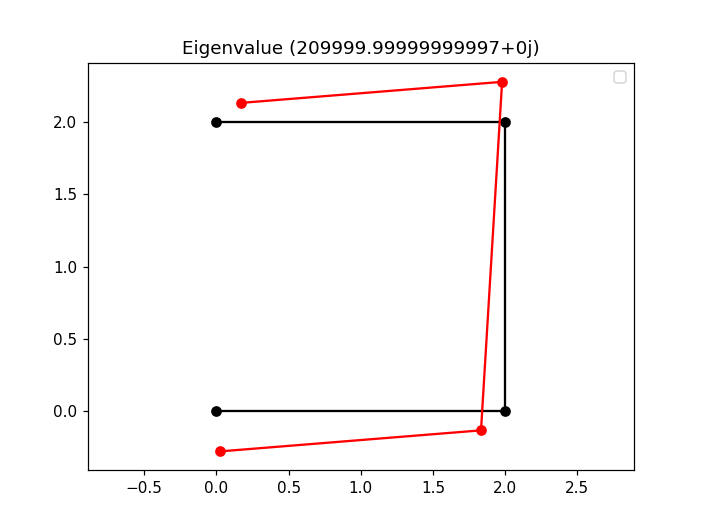

e:\onedrive\tuks\2021-3rd year\env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.


Plane Strain: Eight Eigenvalues
 [-2.91038305e-11+0.00000000e+00j  2.10000000e+05+0.00000000e+00j
  1.05000000e+05+0.00000000e+00j  1.05000000e+05+0.00000000e+00j
 -2.01563613e-11+9.46796623e-12j -2.01563613e-11-9.46796623e-12j
  2.10000000e+05+0.00000000e+00j  2.10000000e+05+0.00000000e+00j]


<IPython.core.display.Javascript object>


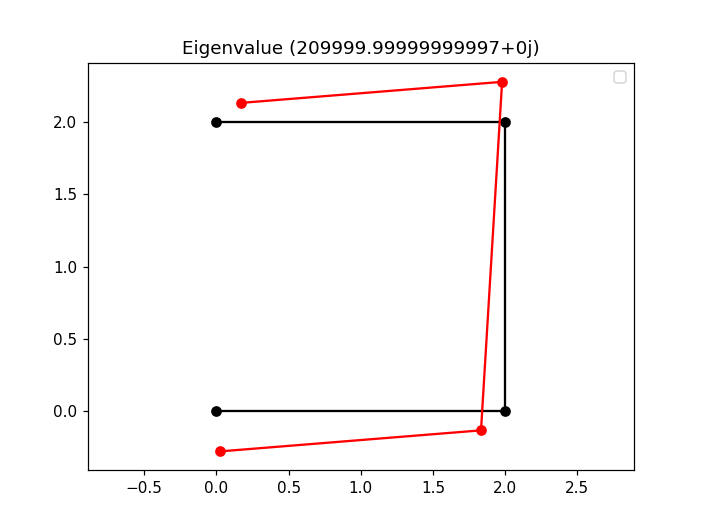

e:\onedrive\tuks\2021-3rd year\env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.


In [36]:
import numpy as np
from elements import Quad4_Stiffness

X = np.array([[0.0, 0],
              [2.0, 0],
              [2.0, 2],
              [0.0, 2]])

E = 2.1E5
v = 0.0
matDpstress = E/(1-v**2)*np.array([[1,v,0],[v,1,0,],[0,0,(1-v)/2]])
matDpstrain = E/((1+v)*(1-2*v))*np.array([[1-v,v,0],[v,1-v,0,],[0,0,(1-2*v)/2]])
print('-----------------------')

Kelem = Quad4_Stiffness(X,matDpstress,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('Plane Stress: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 7
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(200)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()


Kelem = Quad4_Stiffness(X,matDpstrain,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('Plane Strain: Eight Eigenvalues\n {}'.format(Eigenvalue))
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(201)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()

### 2.1

In [ ]:
Plane stress and strain compairison in the case of nu=0

MODE    SHAPEPstress    SHAPEPstrian    ENERGYPstress    ENERGYPstrian   
0       rot-CW          rot_CW          0                0       SAME
1       shear           shear           210 000          210 000 SAME
2       bending         bending         105 000          105 000 SAME
3       pinch           pinch           105 000          105 000 SAME
4       trans+rot       trans+rot       0                0       SAME
5       trans+rot       trans+rot       0                0       SAME
6       stretch+y       stretch+y       210 000          210 000 SAME
7       stretch+y       stretch+y       210 000          210 000 SAME

ALL the same, this makes sense as a posion ratio of 0 means no effect.

### 2.2 

In [ ]:
Plane stress compairison in the case of different materials nu=0 nu=0.3:

MODE    SHAPEP0.0       SHAPEP0.3       ENERGYP0.0       ENERGYP0.3   
0       rot-CW          uni-compress    0                300 000  Compression increased
1       shear           rot-CW          210 000          0       
2       bending         shear+ycomp     105 000          161 538 
3       pinch           bending         105 000          103 846  See Bending decreased
4       trans+rot       pinch           0                103 846  Pinch decreased
5       trans+rot       Y-comp          0                161 538 
6       stretch+y       trans+rot       210 000          0       
7       stretch+y       trans+rot       210 000          0   

## 2.2 Compute the ratio of 
### 2.2.1. the uniform expansion strain energies of the two materials
### 2.2.2. the shear mode strain energies of the two materials
### 2.2.3. the ratio of the bulk modulus of the two materials
### 2.2.4. the ratio of the shear modulus of the two materials
### Identify any relationships that you were able to identify.


In [39]:
print('Unifor expansion strain energy:')
print('nu=0  :',0)
print('nu=0.3:',300000)
print('DWS: infinity')
print('Shearmode strian energies:')
print('nu=0  :',210000)
print('nu=0.3:',161538)
print('DWS:',210000/161538)





Unifor expansion strain energy:
nu=0  : 0
nu=0.3: 300000
DWS: infinity
Shearmode strian energies:
nu=0  : 210000
nu=0.3: 161538
DWS: 1.3000037142963266


# 3. Final study - compare the strain energies and mode shapes between a bar with lenght 2mm, height 2mm and thickness 1mm, modelled as plane stress against a bar of length 4mm, height 1mm and thickness 1mm.

-----------------------
2x2x1: Eight Eigenvalues
 [ 3.00000000e+05+0.00000000e+00j -8.73114914e-11+0.00000000e+00j
  1.61538462e+05+0.00000000e+00j  1.03846154e+05+0.00000000e+00j
  1.03846154e+05+0.00000000e+00j  1.61538462e+05+0.00000000e+00j
  1.25014174e-12+3.03873148e-12j  1.25014174e-12-3.03873148e-12j]


<IPython.core.display.Javascript object>


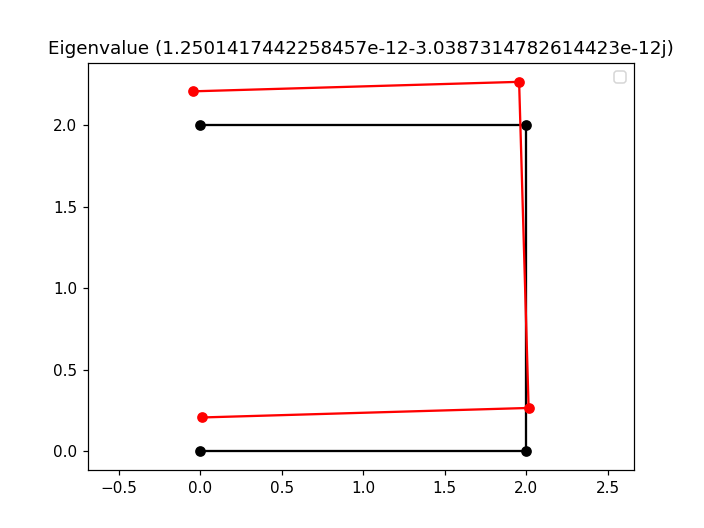

e:\onedrive\tuks\2021-3rd year\env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.


Update the nodal coordinates here to reflect 4 x 1 x 1 structure:
4x2x1: Eight Eigenvalues
 [ 3.00000000e+05+0.00000000e+00j -8.73114914e-11+0.00000000e+00j
  1.61538462e+05+0.00000000e+00j  1.03846154e+05+0.00000000e+00j
  1.03846154e+05+0.00000000e+00j  1.61538462e+05+0.00000000e+00j
  1.25014174e-12+3.03873148e-12j  1.25014174e-12-3.03873148e-12j]


<IPython.core.display.Javascript object>


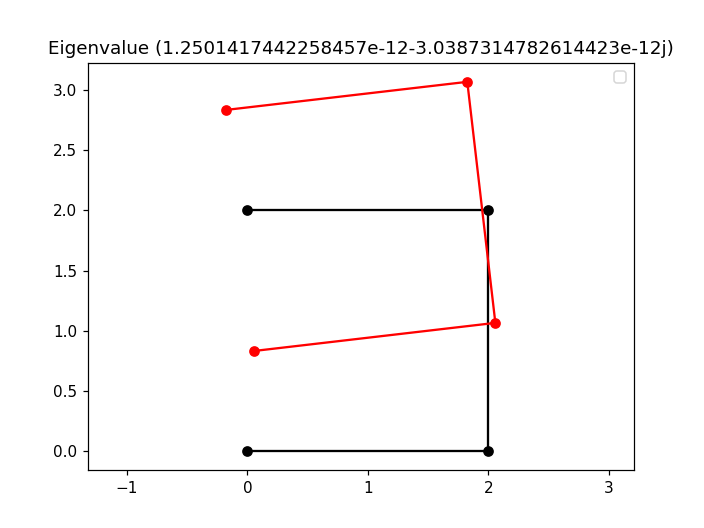

e:\onedrive\tuks\2021-3rd year\env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.


In [51]:
import numpy as np
from elements import Quad4_Stiffness

X = np.array([[0.0, 0],
              [2.0, 0],
              [2.0, 2],
              [0.0, 2]])

E = 2.1E5
v = 0.3
matDpstress = E/(1-v**2)*np.array([[1,v,0],[v,1,0,],[0,0,(1-v)/2]])
print('-----------------------')

Kelem = Quad4_Stiffness(X,matDpstress,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('2x2x1: Eight Eigenvalues\n {}'.format(Eigenvalue))
Mode_Index = 7

Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 0.5
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(300)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()

print('Update the nodal coordinates here to reflect 4 x 1 x 1 structure:')
X = np.array([[0.0, 0],
              [2.0, 0],
              [2.0, 2],
              [0.0, 2]])

Kelem = Quad4_Stiffness(X,matDpstress,1.0)
Eigenvalue, Eigenvector = np.linalg.eig(Kelem)
print('4x2x1: Eight Eigenvalues\n {}'.format(Eigenvalue))
Deformation = Eigenvector[:,Mode_Index]
import matplotlib.pyplot as plt
Factor = 2
NewX = (X[:,0] + Factor*np.take(Deformation,range(0,8,2))).transpose()
NewY = (X[:,1] + Factor*np.take(Deformation,range(1,8,2))).transpose()
plt.figure(301)
plt.plot(X[:,0],X[:,1],'k-o')
plt.plot(NewX, NewY,'r-o')
plt.title('Eigenvalue {}'.format(Eigenvalue[Mode_Index]))
plt.axis('equal')
plt.legend()
plt.show()

In [7]:
Mode shape           Esmall       Ebig
Uniform compression  300000       300000
rot                  0            0
shear                161538       161538
bendingzx            103846       103846
bendingzy            103846       103846
shear                161538       161538
translations         0            0
Translation          0            0
print('All strain enegries are the same:')

Give your discussion here!
